<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#d9394e; overflow:hidden"><b> Data Cleaning and Complete EDA of Poisonous Mushrooms </b></div>

![mushrooms](https://img.freepik.com/free-vector/different-types-mushrooms_1308-86573.jpg?t=st=1722544742~exp=1722548342~hmac=afb99520b515d7ae34bf06b713fd9b50277d5d432b6f9b455d53c475f48bf5ee&w=2000)

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#5b81d4; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#libraries">1. Installing Required Libraries</a>
- <a href="#data">2. Reading and Understanding our Data</a>
- <a href="#clean">3. Data Cleaning</a>
    - <a href="#dropcols">3.1. Remove Columns with High Count of Missing Values</a> 
    - <a href="#infreq">3.2. Deal with Infrequent Categories</a> 
    - <a href="#numerical">3.3. Clean Numerical Columns</a> 
    - <a href="#impute">3.4. Impute Categorical Missing Values</a> 
    - <a href="#dup">3.5. Drop Duplicates</a> 
- <a href="#eda">4. Exploratory Data Analysis</a>
    - <a href="#num">4.1. Distribution of Numerical Features</a> 
    - <a href="#cat">4.2. Distribution of Categorical Features</a> 
    - <a href="#corrnum">4.3. Exploring Correlations between Numerical Features</a> 
    - <a href="#corrcat">4.4. Exploring Correlations between Categorical Features</a> 
    - <a href="#outliers">4.5. Exploring Outliers</a> 
    - <a href="#target">4.6. Distribution of a Target Variable</a> 
- <a href="#ml">5. Data Preprocessing and Data Modeling</a>

<a id="libraries"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#cc263b; overflow:hidden"><b> 1. Installing Required Libraries </b></div>



In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef

palette = sns.color_palette("Spectral", n_colors=13) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

<a id="data"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#cc263b; overflow:hidden"><b> 2. Reading and Understanding our Data </b></div>



In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

df_train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
print(f"There are {df_train.shape[1]} columns and {df_train.shape[0]} rows in the train dataset.")

There are 22 columns and 3116945 rows in the train dataset.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [5]:
print("There are {} duplicates.".format(df_train.duplicated().sum()))

There are 0 duplicates.


In [6]:
print("Checking for missing values in each column:")
print(df_train.isnull().sum())

Checking for missing values in each column:
id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


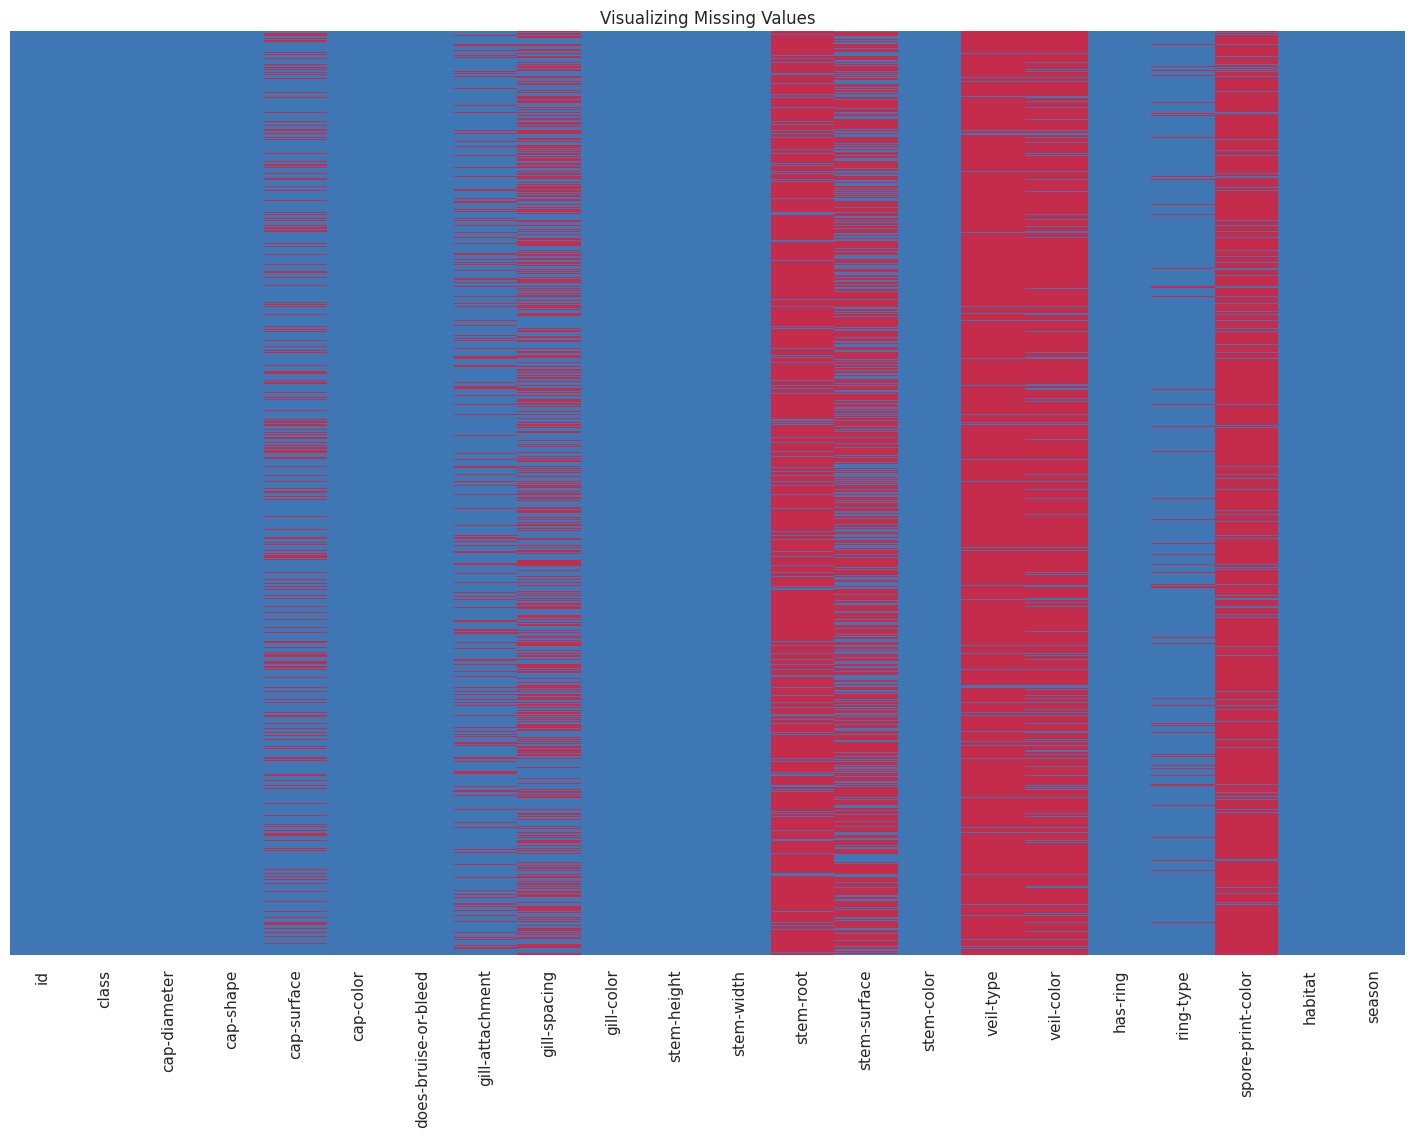

In [7]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(df_train.isnull(), cbar=False, cmap=sns.color_palette("Spectral_r", n_colors=13), yticklabels=False);

<a id="clean"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#cc263b; overflow:hidden"><b> 3. Data Cleaning </b></div>



<a id="dropcols"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 3.1. Remove Columns with High Count of Missing Values </b></div>

In [8]:
# Calculate the percentage of missing values for each column in the training set
missing_train = df_train.isnull().median()

# Identify columns with more than 90% missing values in the training set
columns_to_drop = missing_train[missing_train > 0.9].index

# Drop the identified columns from both datasets
df_train_cleaned = df_train.drop(columns_to_drop, axis=1)
df_test_cleaned = df_test.drop(columns_to_drop, axis=1)

In [9]:
print("Original number of columns:")
print(df_train.shape[1])

print("\nNumber of columns in cleaned DataFrame:")
print(df_train_cleaned.shape[1])

Original number of columns:
22

Number of columns in cleaned DataFrame:
17


<a id="infreq"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 3.2. Deal with Infrequent Categories</b></div>

In [10]:
# Drop 'id' column
df_train_cleaned = df_train_cleaned.drop(['id'], axis=1)

# Define the target column
target_column = 'class'

# Select categorical columns, excluding the target column
categorical_columns = df_train_cleaned.select_dtypes(include=['object']).columns.drop(target_column)

# Select numerical columns, excluding the target column if it's numerical
numerical_columns = df_train_cleaned.select_dtypes(exclude=['object']).columns.drop(target_column, errors='ignore')

In [11]:
# Iterate through each object column and print its counts of unique values (first 10)
for column in categorical_columns:
    value_counts = df_train_cleaned[column].value_counts().head(10)
    print(f"\nTop value counts in '{column}': \n{value_counts}")


Top value counts in 'cap-shape': 
cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
Name: count, dtype: int64

Top value counts in 'cap-surface': 
cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64

Top value counts in 'cap-color': 
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64

Top value counts in 'does-bruise-or-bleed': 
does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
a          7
b          7
x          7
y          7
k          6
Name: count, dtype: int64

Top value counts in 'gill-attachment': 
gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
c        74
u        56
w        37
Nam

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        One of the problems is that some categories appear in a small proportion of rows, making it impractical to create separate dummy columns for them. We'll replace these infrequent categories with a category "Unknown".
    </ul>
</div>

In [12]:
# Define a function to identify and replace infrequent categories
def replace_infrequent_categories(df, column, threshold=70):
    # Calculate value counts for the column
    value_counts = df[column].value_counts()

    # Determine infrequent categories (those occurring less than or equal to the threshold)
    infrequent = value_counts[value_counts <= threshold].index

    # Replace infrequent categories with the mode
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)

    return df

# Handle invalid values and infrequent categories for all categorical columns
for col in categorical_columns:
    df_train_cleaned = replace_infrequent_categories(df_train_cleaned, col)
    df_test_cleaned = replace_infrequent_categories(df_test_cleaned, col)

<a id="numerical"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 3.3. Clean Numerical Columns </b></div>

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        We will evaluate skewness of numerical columns: if the absolute skewness is greater than 1, we'll use the median to fill the missing values; if it's less skewed, we will use the mean.
    </ul>
</div>

In [13]:
df_train_cleaned[numerical_columns].apply(lambda x: stats.skew(x.dropna()))

cap-diameter    3.972607
stem-height     1.926681
stem-width      1.235426
dtype: float64

In [14]:
# Compute medians for numerical columns in the training set
medians = df_train_cleaned[numerical_columns].median()

# Fill missing values in the training and testing sets
df_train_cleaned[numerical_columns] = df_train_cleaned[numerical_columns].fillna(medians)
df_test_cleaned[numerical_columns] = df_test_cleaned[numerical_columns].fillna(medians)

<a id="impute"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 3.4. Impute Categorical Missing Values </b></div>

In [15]:
# Impute any missing values with 'Unknown'
df_train_cleaned = df_train_cleaned.fillna("Unknown")
df_test_cleaned = df_test_cleaned.fillna("Unknown")

<a id="dup"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 3.5. Drop Duplicates</b></div>

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        Replacing infrequent categories created duplicated rows in train dataset. Let's drop them.
    </ul>
</div>

In [16]:
print("There are {} duplicates in train dataset.".format(df_train_cleaned.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(df_test_cleaned.duplicated().sum()))

There are 479 duplicates in train dataset.
There are 0 duplicates in test dataset.


In [17]:
df_train_cleaned = df_train_cleaned.drop_duplicates()

<a id="eda"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#cc263b; overflow:hidden"><b> 4. Exploratory Data Analysis </b></div>

<a id="num"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 4.1. Distribution of Numerical Features</b></div>

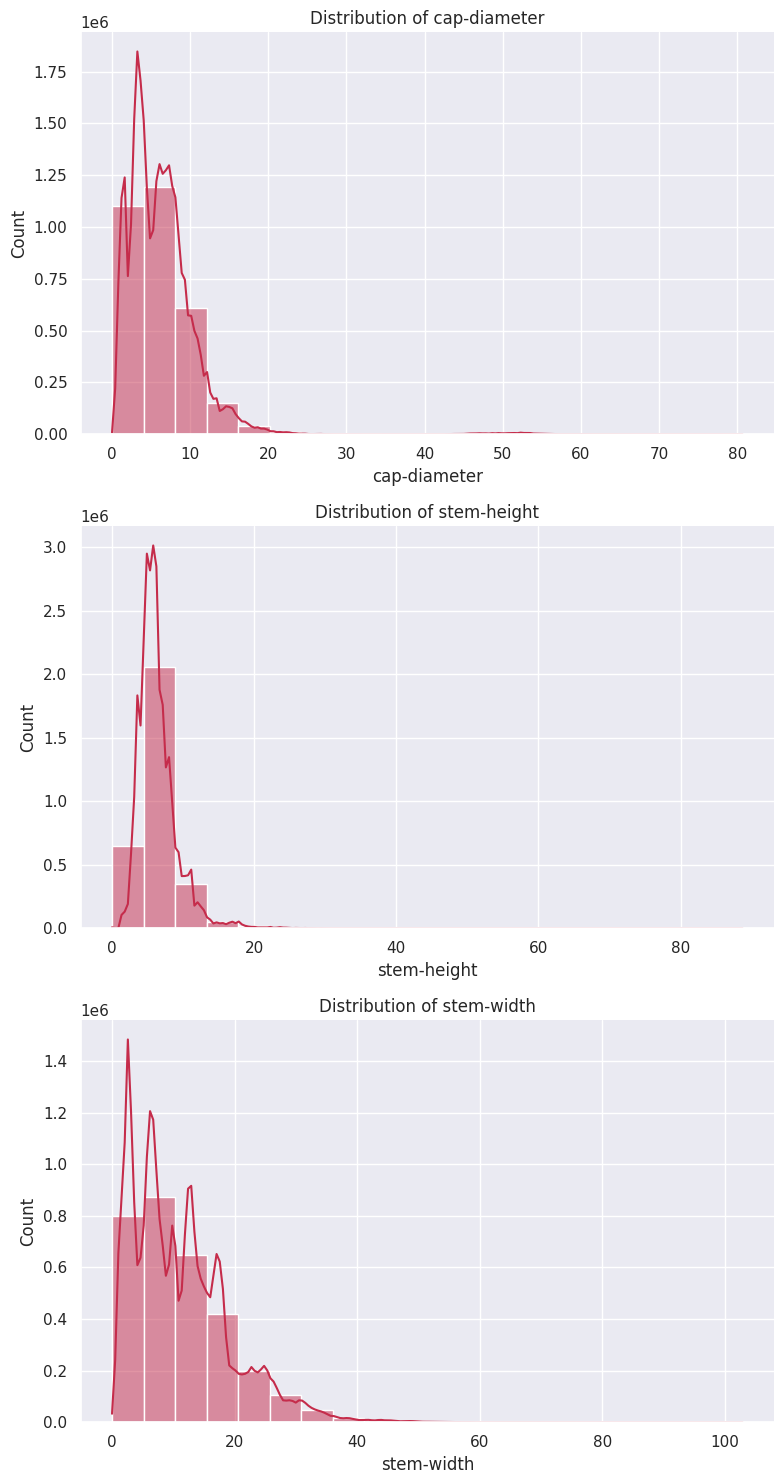

In [18]:
# Identify numerical columns: columns with more than 15 unique values are considered numerical
numerical_columns = [col for col in df_train_cleaned.columns if df_train_cleaned[col].nunique() > 15]

plt.figure(figsize=(8, 15)) 

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=df_train_cleaned, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

<a id="cat"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 4.2. Distribution of Categorical Features</b></div>

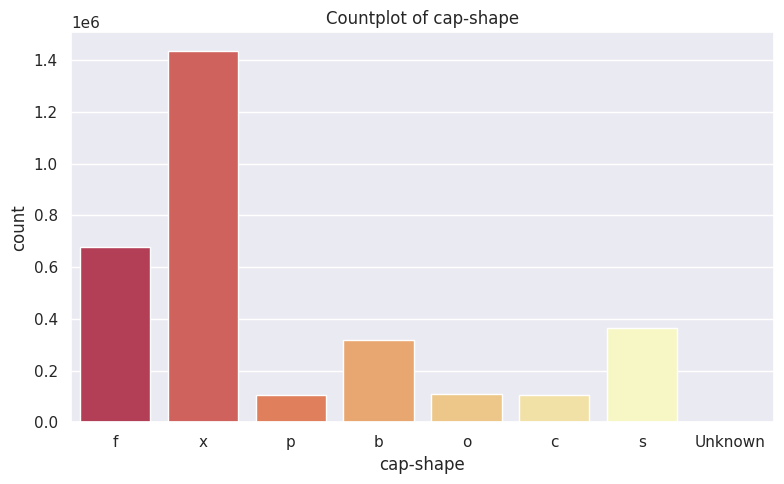

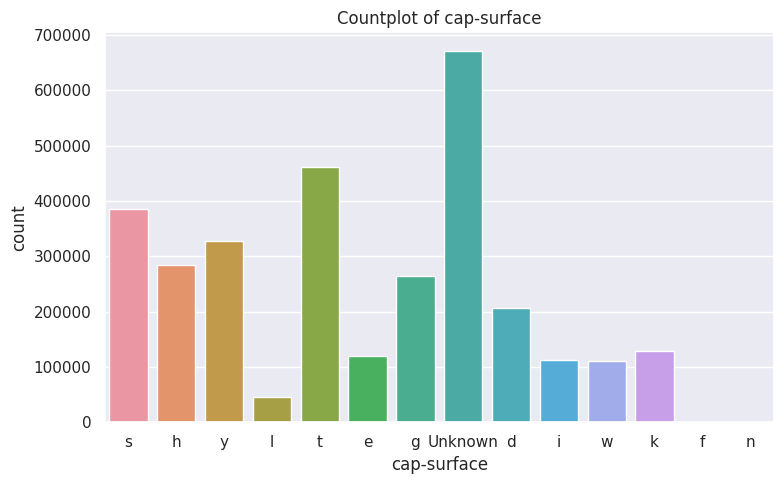

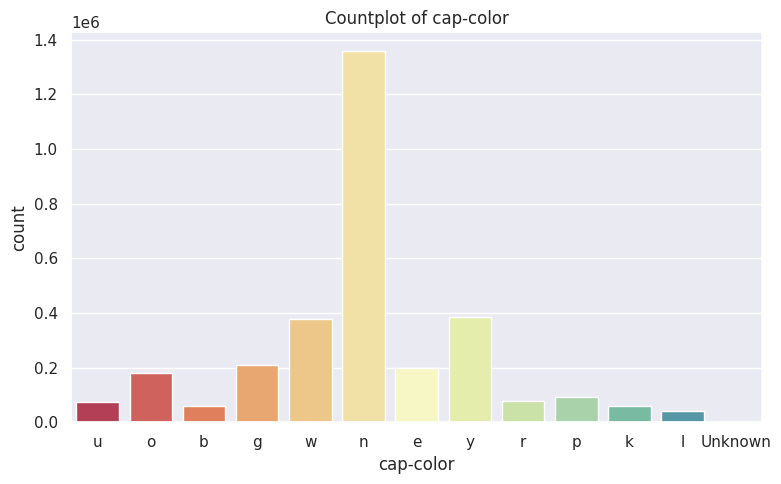

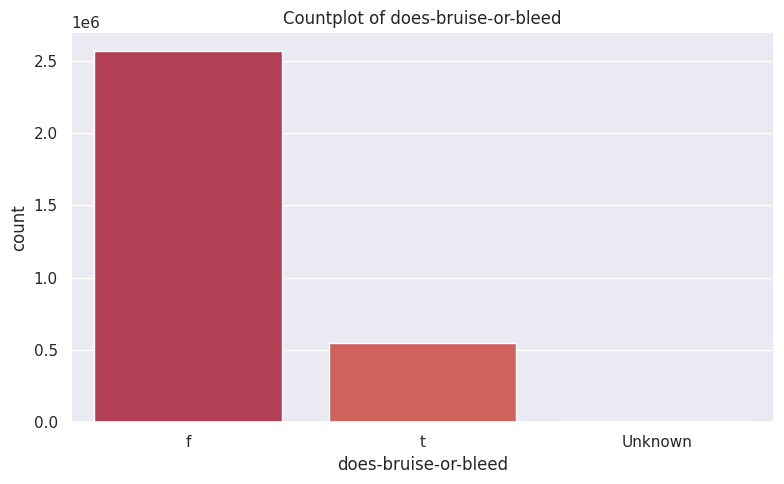

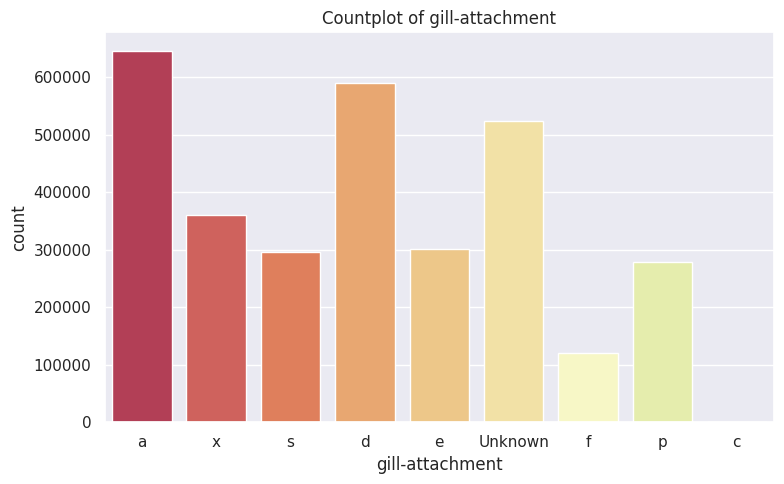

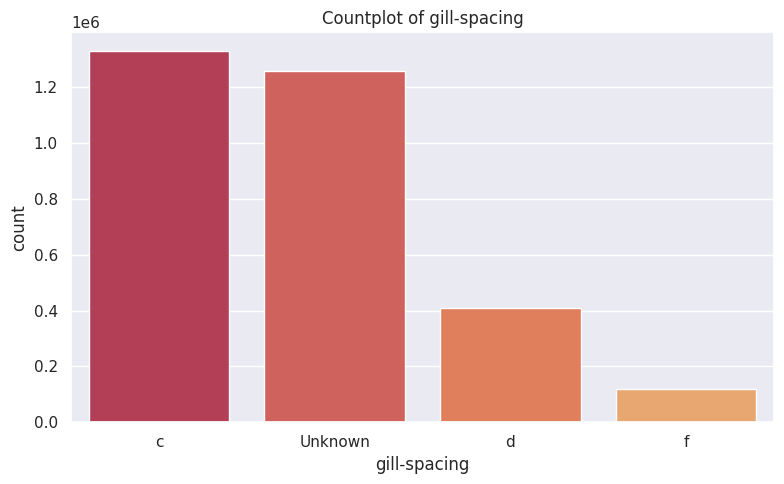

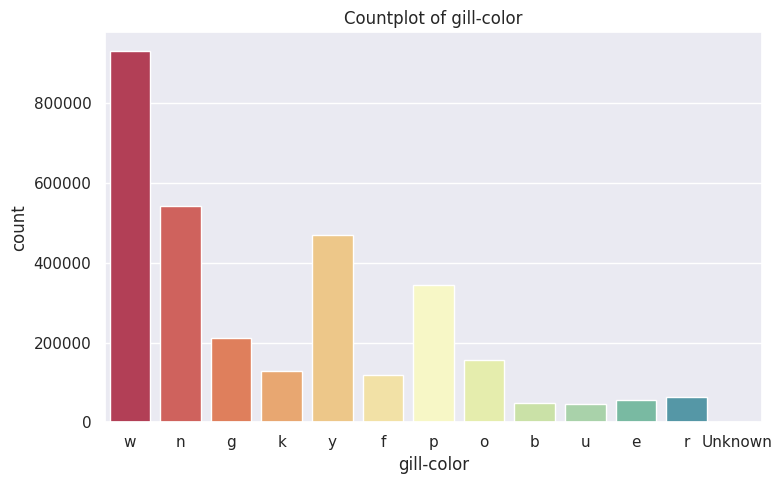

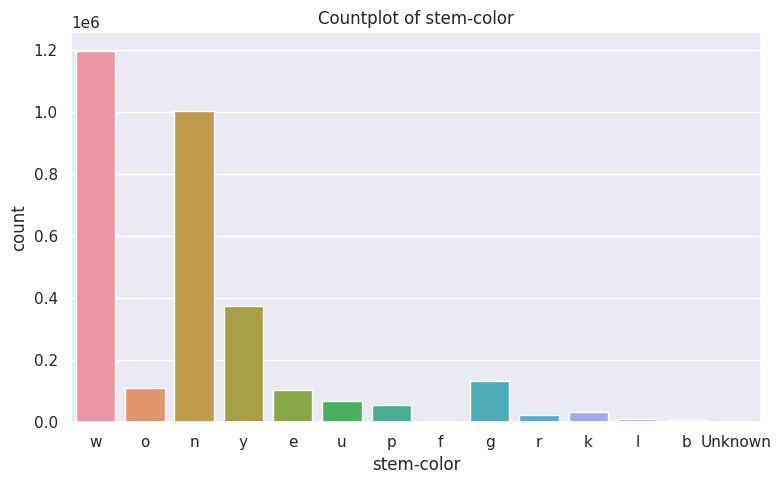

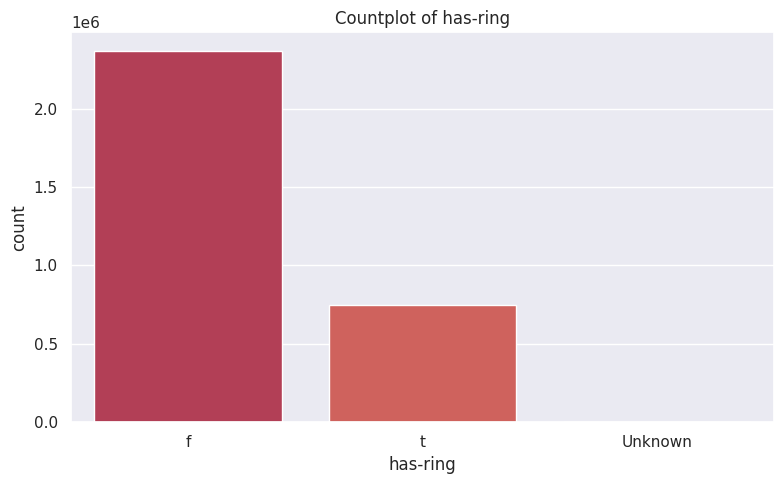

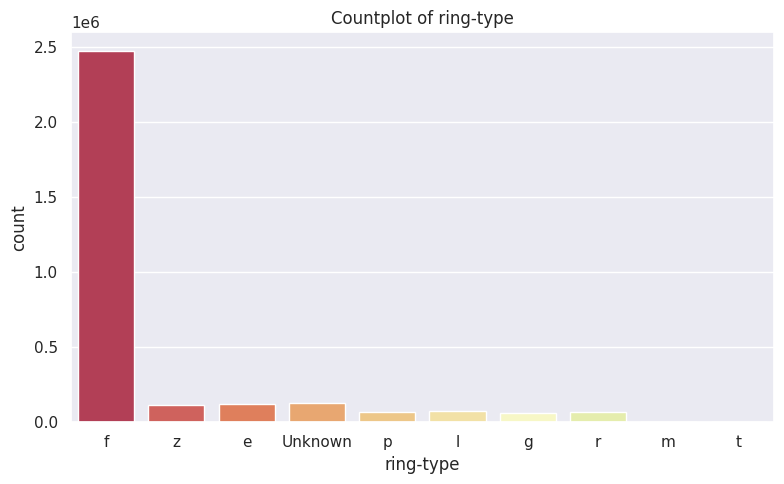

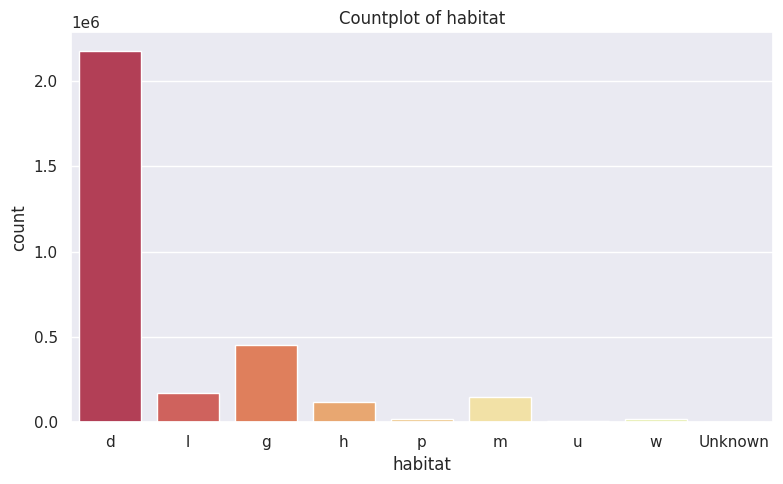

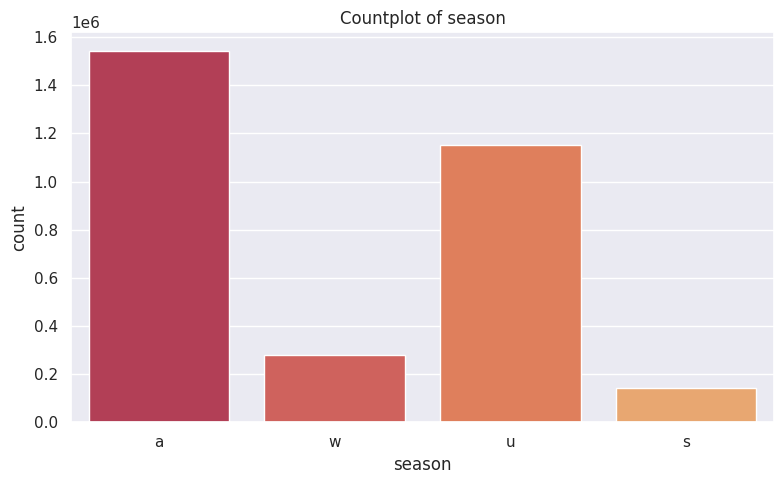

In [19]:
# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_train_cleaned, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

<a id="corrnum"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 4.3. Exploring Correlations between Numerical Features</b></div>

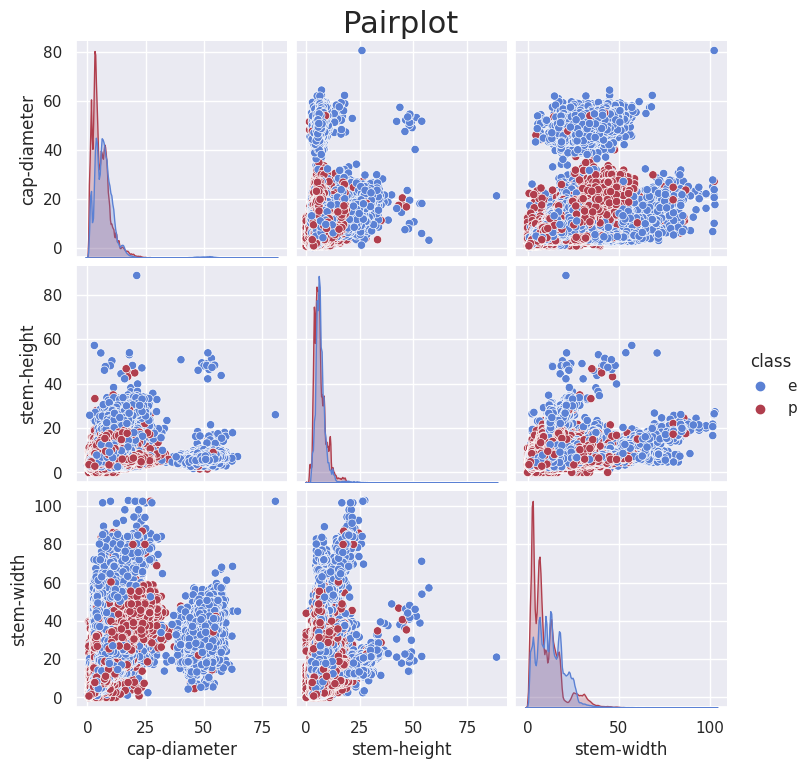

In [20]:
custom_palette = sns.color_palette(["#5b81d4", "#b03e4d"])

pairplot = sns.pairplot(df_train_cleaned, hue='class', palette=custom_palette)
pairplot.figure.suptitle('Pairplot', fontsize=22, y=1.02)
plt.show()

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        Notice the distinct clusters, particularly in the scatterplot of cap diameter versus stem width. Poisonous mushrooms tend to have smaller caps and narrower stems simultaneously.
    </ul>
</div>

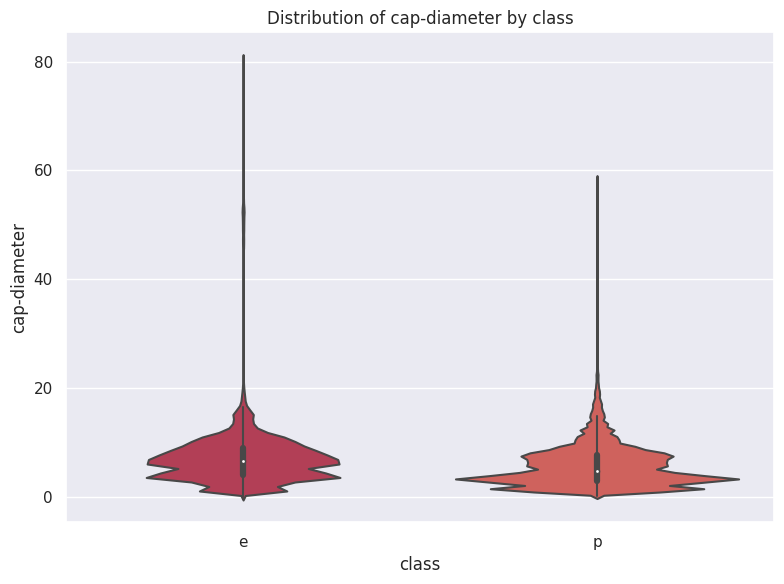

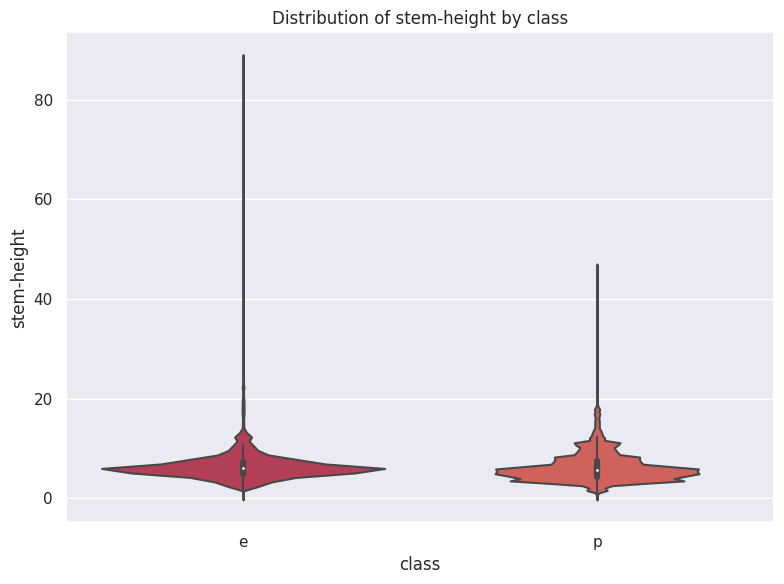

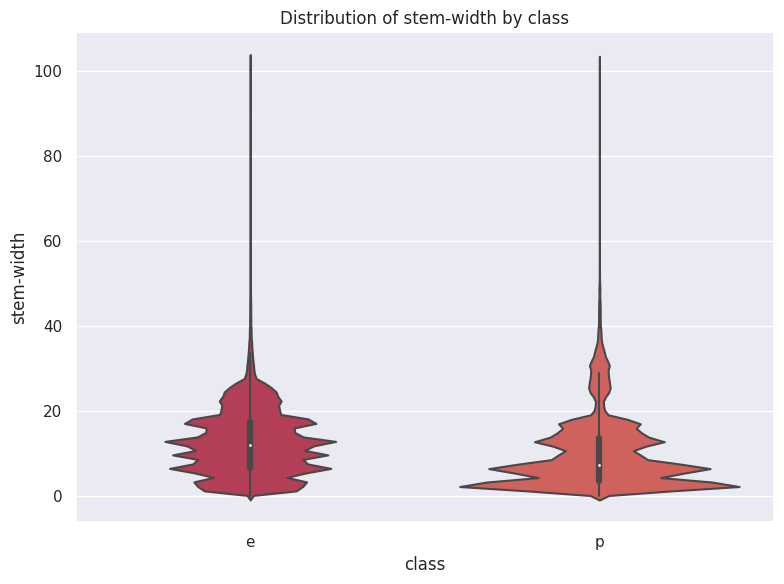

In [21]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_train_cleaned, x='class', y=column) 
    plt.title(f'Distribution of {column} by class')

    plt.tight_layout()
    plt.show()

<a id="corrcat"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 4.4. Exploring Correlations between Categorical Features</b></div>

<Figure size 800x600 with 0 Axes>

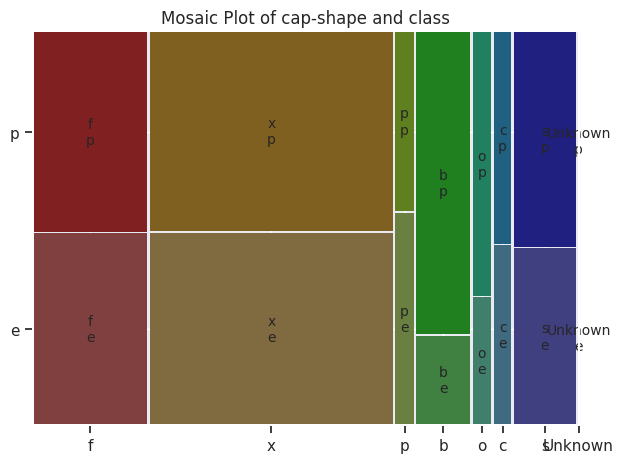

<Figure size 800x600 with 0 Axes>

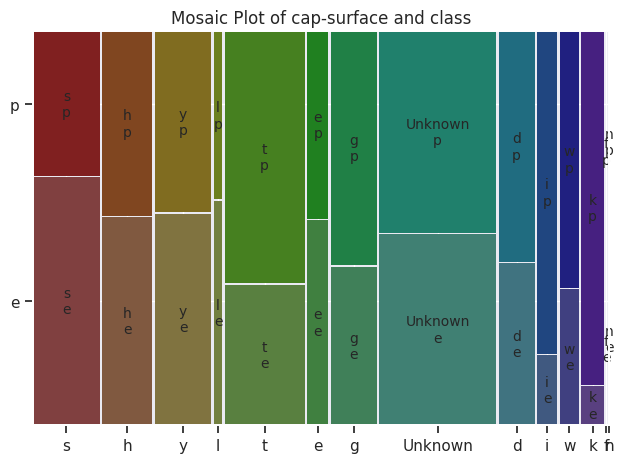

<Figure size 800x600 with 0 Axes>

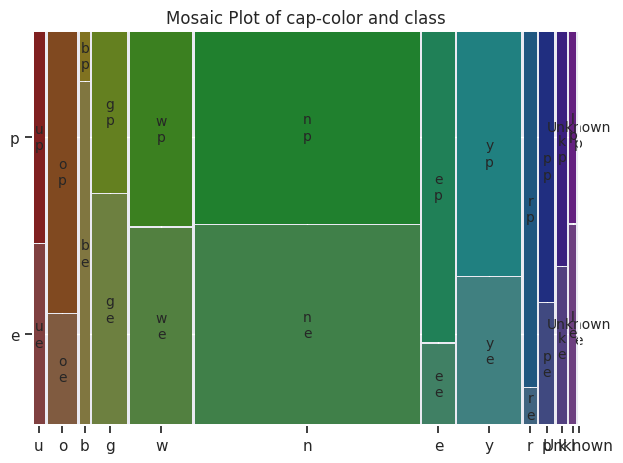

<Figure size 800x600 with 0 Axes>

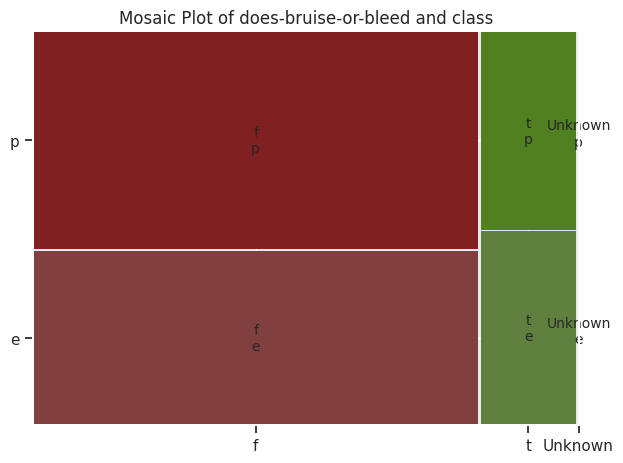

<Figure size 800x600 with 0 Axes>

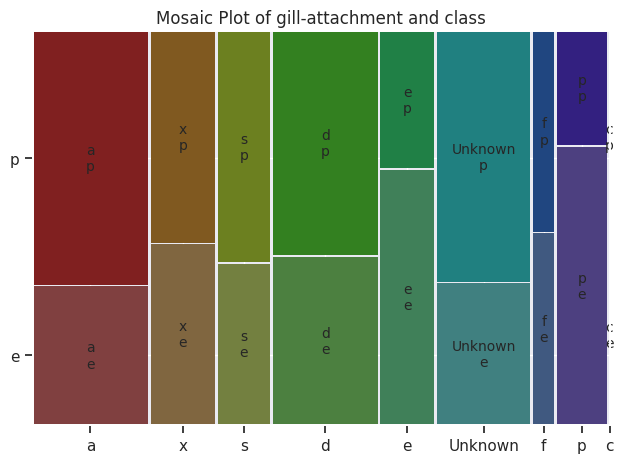

<Figure size 800x600 with 0 Axes>

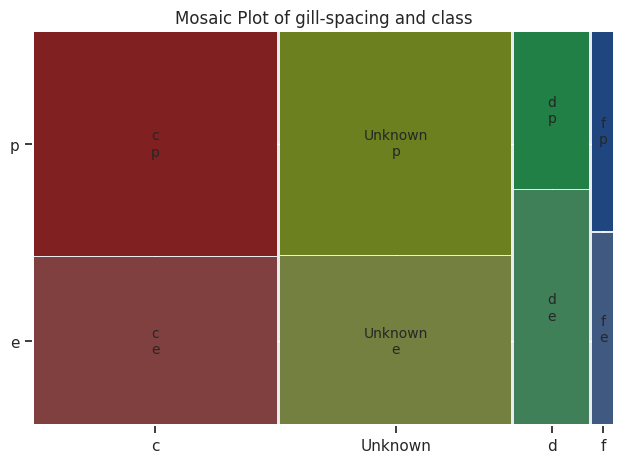

<Figure size 800x600 with 0 Axes>

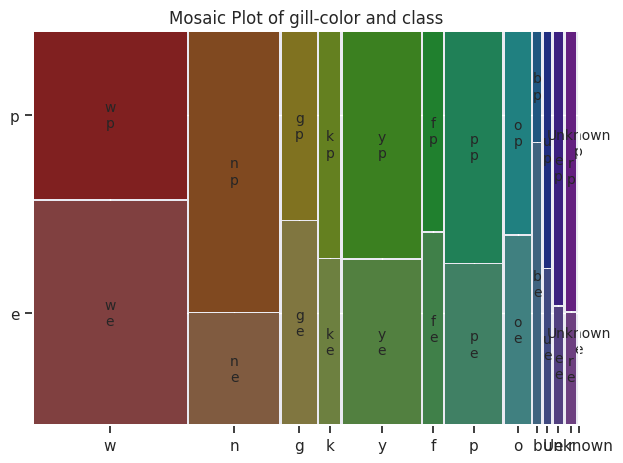

<Figure size 800x600 with 0 Axes>

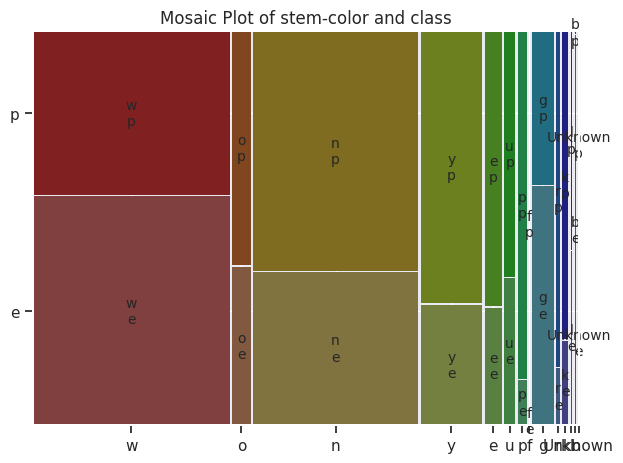

<Figure size 800x600 with 0 Axes>

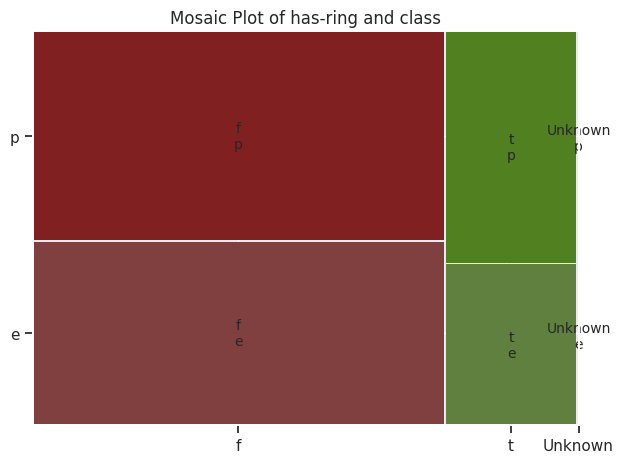

<Figure size 800x600 with 0 Axes>

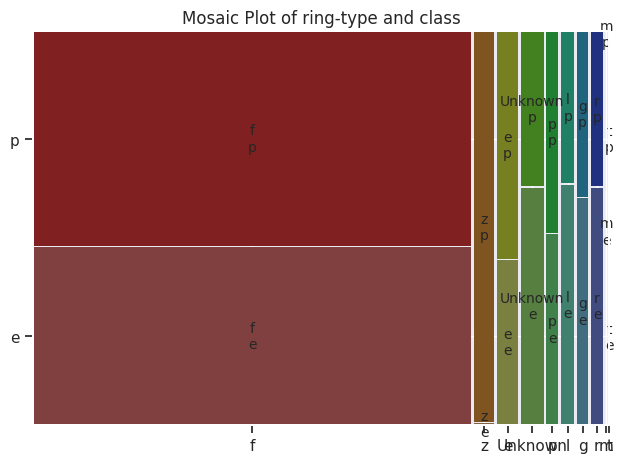

<Figure size 800x600 with 0 Axes>

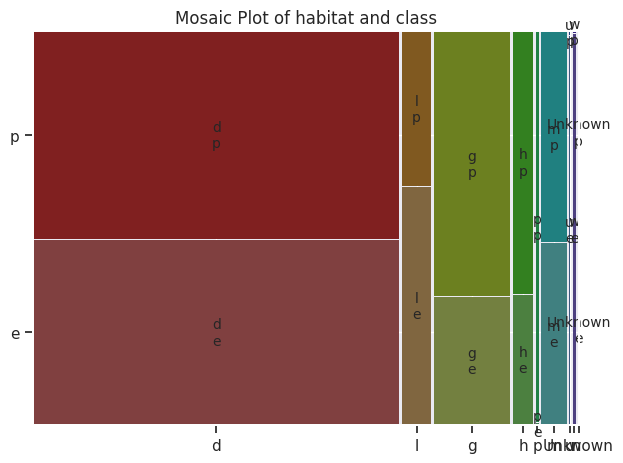

<Figure size 800x600 with 0 Axes>

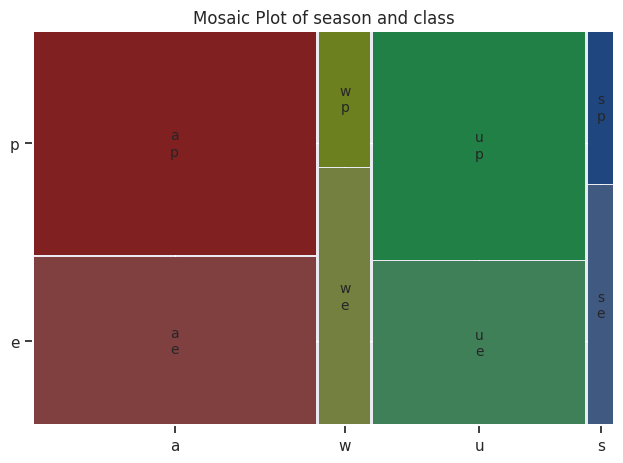

In [22]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    mosaic(df_train_cleaned, [column, 'class'])
    plt.title(f'Mosaic Plot of {column} and class')

    plt.tight_layout()
    plt.show()

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        Based on the visualizations above, it is evident that edible and poisonous mushrooms have distinct characteristics. For example, edible mushrooms are more prevalent in summer and winter, whereas poisonous mushrooms are more commonly found in autumn and spring. This suggests we may be able create a precise model to predict whether a mushroom is edible based on its features.
    </ul>
</div>

<a id="outliers"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 4.5. Exploring Outliers</b></div>

In [23]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(df_train_cleaned[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,cap-diameter,stem-height,stem-width
count,3116466.000,3116466.000,3116466.000
mean,-0.000,0.000,0.000
std,1.000,1.000,1.000
min,-1.348,-2.351,-1.378
25%,-0.642,-0.622,-0.764
50%,-0.120,-0.174,-0.186
75%,0.414,0.393,0.553
max,15.964,30.510,11.333


<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        From the Z-scores and Violin plots visualized eariler, you can observe the presence of outliers in all three numerical columns. Specifically, the Z-scores of 15, 30, and 11 are significantly high, indicating that these values are far from the mean and lie outside the expected range of data. Such high Z-scores suggest that the corresponding data points are extreme outliers, which could potentially skew the analysis and interpretation of the data. There are various methods for removing outliers. One approach is to drop rows where the absolute value of Z-score exceeds 3, which is the method I will use.
    </ul> 
</div>

In [24]:
numerical_df = df_train_cleaned[numerical_columns]

# Create a DataFrame for Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_df.columns)

# Define the threshold
threshold = 3

# Filter out rows with any Z-score above the threshold in numerical columns
df_train_no_outliers = df_train_cleaned[(z_scores_df.abs() < threshold).all(axis=1)]

<a id="target"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:#a61d2f; overflow:hidden"><b> 4.6. Distribution of a Target Variable</b></div>

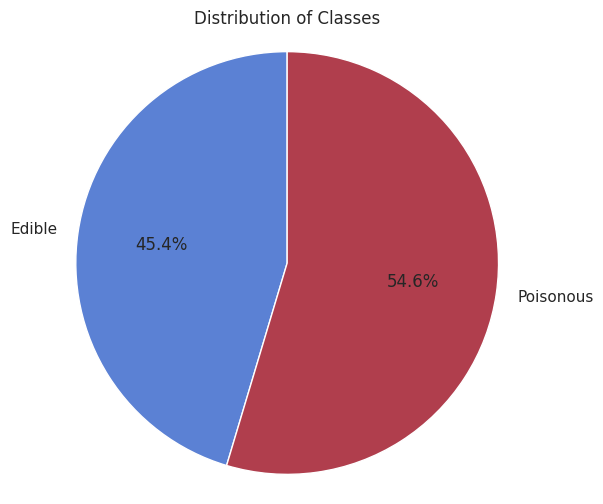

In [25]:
# Calculate counts for the pie chart and add labels
class_counts = df_train_no_outliers['class'].value_counts().sort_index()
labels = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, colors=custom_palette,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<a id="ml"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#cc263b; overflow:hidden"><b> 5. Data Preprocessing and Data Modeling </b></div>

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 85%; margin: 0 auto;">
    <h2 style="text-align: center;">Preprocessing Steps Explained</h2>
    <ul style="font-size: 16px; font-family: 'Arial'; line-height: 1.5em;">
        <li><strong>LabelEncoder Initialization</strong>: We start by creating an instance of <code>LabelEncoder</code>, which is used to convert categorical labels (like 'e', 'p') into numerical values (like 0, 1).</li>
        <li><strong>Convert Categorical Columns to 'Category' dtype</strong>: This conversion is efficient for memory usage and makes it easier to apply specific transformations to these columns.</li>
        <li><strong>Defining the Numerical Pipeline</strong>: 
            <ul>
                <li><strong>StandardScaler</strong>: This step standardizes the numerical features by removing the mean and scaling to unit variance.</li>
                <li><strong>Convert to float32</strong>: This step converts the data type to <code>float32</code> to save memory, similar to converting categorical columns to 'category' dtype.</li>
            </ul>
        </li>
        <li><strong>Defining the Categorical Pipeline</strong>:
            <ul>
                <li><strong>OneHotEncoder</strong>: This transforms categorical data into a binary (one-hot encoded) format. The <code>drop='first'</code> argument helps to avoid multicollinearity by dropping the first category. The <code>handle_unknown='ignore'</code> argument ensures that any unknown categories in the test data are ignored (it will not create new columns for these categories, nor will it raise an error).</li>
            </ul>
        </li>
        <li><strong>ColumnTransformer</strong>: Combines the numerical and categorical pipelines into a single transformation step.</li>
        <li><strong>Convert to Dense Arrays</strong>: This step converts the sparse matrix to a dense format (standard array) for easier manipulation and to avoid errors.</li>
        <li><strong>Extracting Feature Names</strong>: The <code>OneHotEncoder</code> generates new feature names based on the categories. We extract these names and merge them with the numerical feature names into one list.</li>
        <li><strong>Convert to DataFrames</strong>: Finally, we convert the dense arrays back into pandas DataFrames, using the combined feature names as column names.</li>
    </ul> 
</div>

In [26]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
train_encoded_target = label_encoder.fit_transform(df_train_no_outliers[['class']])

# Convert categorical columns to 'category' dtype 
df_train_no_outliers[categorical_columns] = df_train_no_outliers[categorical_columns].astype('category')
df_test_cleaned[categorical_columns] = df_test_cleaned[categorical_columns].astype('category')

# Define the numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

# Define the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', dtype=np.int32, handle_unknown='ignore'))
])

# Combine both numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Apply the transformations using the pipeline
df_train_encoded = preprocessor.fit_transform(df_train_no_outliers)
df_test_encoded = preprocessor.transform(df_test_cleaned)

# Ensure outputs are dense arrays
train_encoded_dense = df_train_encoded.toarray()
test_encoded_dense = df_test_encoded.toarray()

# Get feature names
numerical_feature_names = numerical_columns  # Assuming numerical columns do not change names
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)

# Combine the feature names
all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

# Debugging: Print the number of feature names
print("Number of Features:", len(all_feature_names))

# Convert the transformed dense arrays back into DataFrames
train_encoded_df = pd.DataFrame(train_encoded_dense, columns=all_feature_names)
test_encoded_df = pd.DataFrame(test_encoded_dense, columns=all_feature_names)

Number of Features: 95


In [27]:
# Separate features (X) and target variable (y)
X = df_train_encoded
y = train_encoded_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

```python
## Tuning Hyperparameters

# Define the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 5, 7, 14],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.9],
    'colsample_bytree': [0.4, 0.6, 0.8]
}

# Define a custom scoring function for MCC
def mcc_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return matthews_corrcoef(y, y_pred)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring=mcc_scorer, 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:\n", grid_search.best_params_)
print("Best MCC Score:\n", grid_search.best_score_)

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
print("Test MCC Score:", matthews_corrcoef(y_test, y_pred))
```

In [28]:
# Define the best parameters
params = {
    'colsample_bytree': 0.4, 
    'learning_rate': 0.1, 
    'max_depth': 14, 
    'min_child_weight': 1, 
    'n_estimators': 200, 
    'subsample': 0.9,
    'use_label_encoder': False,  
    'eval_metric': 'mlogloss'   
}

# Initialize the XGBClassifier with the defined parameters
xgb_model = XGBClassifier(**params)

# Fit the model to the training data 
xgb_model.fit(X_train, y_train)

# Predict on the test data 
y_pred = xgb_model.predict(X_test)

# Evaluate the model using Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.983403859658269
